# Clasificación útilizando aprendizaje de máquinas

En aprendizaje de máquinas, la clasificación es el problema de identificar a qué clase (de un grupo finito de clases) una observación nueva pertenece, tomando como base un entrenamiento previo sobre un grupo de observaciones donde sí se conocían sus clases correspondientes.

In [1]:
import pandas as pd # Biblioteca de manejo de datos vectoriales
import sklearn.preprocessing # Preparación de los conjuntos de datos para entrenamiento
import sklearn.model_selection # Funciones para preprocesar nuestros datos
import sklearn.linear_model # Regresión logística
import sklearn.metrics # Métricas de desempeño de modelos
import sklearn.tree # Decision trees
import sklearn.ensemble # Random forest
import sklearn.svm # Support vector machines
import sklearn.dummy # Clasificador tonto
import matplotlib.pyplot as plt # Biblioteca de visualización

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Utilizaremos un conjunto de datos que relaciona características fisiológicas de pacientes con la presencia de una enfermedad cardiovascular.

In [2]:
cardiovascular_diseases = pd.read_csv("data/cardiovascular_diseases.csv") # Importamos el conjunto de datos desde la carpeta data

In [3]:
cardiovascular_diseases.head() # Exploramos las primeras instancias del dataframe

,age,male,chest_pain_type,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,thalassemia,cardiovascular_disease
0,45,0,typical_angina,138,236,0,0,152,1,0.2,0,0,fixed_defect,1
1,61,1,typical_angina,120,260,0,1,140,1,3.6,0,1,reversable_defect,0
2,44,0,non_anginal_pain,108,141,0,1,175,0,0.6,0,0,fixed_defect,1
3,77,1,typical_angina,125,304,0,0,162,1,0.0,-1,3,fixed_defect,0
4,35,1,typical_angina,126,282,0,0,156,1,0.0,-1,0,reversable_defect,0


Verificamos la forma del conjunto de datos.

In [4]:
cardiovascular_diseases.shape

(301, 14)

Exploramos cómo se distribuyen las características.

In [5]:
cardiovascular_diseases.describe()

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.378738,0.684385,131.647841,246.504983,0.146179,0.528239,149.740864,0.325581,1.043189,-0.398671,0.734219,0.544850
std,9.110950,0.465534,17.594002,51.915998,0.353874,0.526023,22.891031,0.469372,1.163384,0.616872,1.024268,0.498814
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000,4.000000,1.000000


Verificamos el balanceo de clases de nuestro conjunto de datos. Si las clases están desbalanceadas debemos realizar un preprocesamiento específico.

In [6]:
cardiovascular_diseases.cardiovascular_disease.value_counts()

1    164
0    137
Name: cardiovascular_disease, dtype: int64

A las características se les realiza una transformación One-Hot en donde las características discretas con un número `i` de categorías se les transforma en `i` características nuevas binarias. Esto es necesario, porque los algoritmos necesitan una representación estrictamente numérica de las características y este método no les asigna un número entero porque estas variables no tienen un orden ni valor numérico real. Por ejemplo si se tiene una característica con los valores

```
animal = ["perro","gato","conejo","perro"]
```

y se le transforma utilizando One-Hot Encoding, se generan estas 3 nuevas características

```
animal_conejo = [0, 0, 1, 0]
animal_gato =   [0, 1, 0, 0]
animal_perro =  [1, 0, 0, 1]
```


Con la función pandas.get_dummies() realizamos la transformación.

In [7]:
cardiovascular_diseases = pd.get_dummies(cardiovascular_diseases)
cardiovascular_diseases

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,45,0,138,236,0,0,152,1,0.2,0,0,1,0,0,0,1,1,0,0
1,61,1,120,260,0,1,140,1,3.6,0,1,0,0,0,0,1,0,0,1
2,44,0,108,141,0,1,175,0,0.6,0,0,1,0,0,1,0,1,0,0
3,77,1,125,304,0,0,162,1,0.0,-1,3,0,0,0,0,1,1,0,0
4,35,1,126,282,0,0,156,1,0.0,-1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,59,0,174,249,0,1,143,1,0.0,0,0,0,0,0,0,1,1,0,0
297,52,1,118,186,0,0,190,0,0.0,0,0,1,1,0,0,0,0,1,0
298,66,1,120,302,0,0,151,0,0.4,0,0,1,0,0,0,1,1,0,0
299,51,1,140,298,0,1,122,1,4.2,0,3,0,0,0,0,1,0,0,1


Escalamos nuestras características para que todas se encuentren en el mismo rango. Algunos métodos se comportan deficientemente cuando los rangos de las características difieren.

Utilizaremos un escalamiento Min-Max para escalar los valores entre valores 0 y 1.

In [8]:
scaler = sklearn.preprocessing.MinMaxScaler()
numeric_variables = ["age","resting_blood_pressure","cholesterol","maximum_heart_rate_achieved","st_depression_by_exercise","slope_st_by_excercise_peak","number_of_vessels_colored_by_flouroscopy"]
cardiovascular_diseases[numeric_variables] = pd.DataFrame(scaler.fit_transform(cardiovascular_diseases[numeric_variables]))

In [9]:
cardiovascular_diseases

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
0,0.333333,0,0.415094,0.251142,0,0,0.618321,1,0.032258,0.5,0.00,1,0,0,0,1,1,0,0
1,0.666667,1,0.245283,0.305936,0,1,0.526718,1,0.580645,0.5,0.25,0,0,0,0,1,0,0,1
2,0.312500,0,0.132075,0.034247,0,1,0.793893,0,0.096774,0.5,0.00,1,0,0,1,0,1,0,0
3,1.000000,1,0.292453,0.406393,0,0,0.694656,1,0.000000,0.0,0.75,0,0,0,0,1,1,0,0
4,0.125000,1,0.301887,0.356164,0,0,0.648855,1,0.000000,0.0,0.00,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.625000,0,0.754717,0.280822,0,1,0.549618,1,0.000000,0.5,0.00,0,0,0,0,1,1,0,0
297,0.479167,1,0.226415,0.136986,0,0,0.908397,0,0.000000,0.5,0.00,1,1,0,0,0,0,1,0
298,0.770833,1,0.245283,0.401826,0,0,0.610687,0,0.064516,0.5,0.00,1,0,0,0,1,1,0,0
299,0.458333,1,0.433962,0.392694,0,1,0.389313,1,0.677419,0.5,0.75,0,0,0,0,1,0,0,1


Verificamos que ahora nuestras características sí se encuentran en el mismo rango.

In [10]:
cardiovascular_diseases.describe()

,age,male,resting_blood_pressure,cholesterol,high_fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,st_depression_by_exercise,slope_st_by_excercise_peak,number_of_vessels_colored_by_flouroscopy,cardiovascular_disease,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non_anginal_pain,chest_pain_type_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.528724,0.684385,0.355168,0.275126,0.146179,0.528239,0.601075,0.325581,0.168256,0.300664,0.183555,0.544850,0.076412,0.166113,0.285714,0.471761,0.551495,0.059801,0.388704
std,0.189811,0.465534,0.165981,0.118530,0.353874,0.526023,0.174741,0.469372,0.187643,0.308436,0.256067,0.498814,0.266099,0.372802,0.452506,0.500033,0.498169,0.237512,0.488268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.245283,0.194064,0.000000,0.000000,0.480916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.000000,0.339623,0.262557,0.000000,1.000000,0.625954,0.000000,0.129032,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.666667,1.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.258065,0.500000,0.250000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Separamos las características y las etiquetas en variables distintas.

In [11]:
cardiovascular_diseases_features = cardiovascular_diseases.drop("cardiovascular_disease",axis=1)
feature_names = cardiovascular_diseases_features.columns
cardiovascular_diseases_label = cardiovascular_diseases.cardiovascular_disease

Para poder evaluar los desempeños de nuestros modelos de la manera más válida posible, se suele dividir nuestro conjunto de datos un en subconjunto de entrenamiento y uno de prueba. El subconjunto de entrenamiento es el único que utilizaremos para entrenar nuestro modelo. El subconjunto de prueba es independiente al de entrenamiento y con este evaluamos las métricas de desempeño de nuestro modelo.

Para fácilemente realizar esta separación utilizamos la función sklearn.model_selection.train_test_split()

In [12]:
(
    cardiovascular_diseases_features_train, 
    cardiovascular_diseases_features_test, 
    cardiovascular_diseases_label_train, 
    cardiovascular_diseases_label_test
) = sklearn.model_selection.train_test_split(
    cardiovascular_diseases_features, 
    cardiovascular_diseases_label, 
    test_size=0.33, 
    random_state=11
)

## Regresión logística

Utilizaremos uno de los métodos más simples para entrenar un modelo, el cual se encuentra implementado en la clase sklearn.linear_model.LogisticRegression().

In [13]:
lr = sklearn.linear_model.LogisticRegression() # Instanciamos el algoritmo para entrenar un modelo de regresión logística
lr.fit(cardiovascular_diseases_features_train, cardiovascular_diseases_label_train) # Ajustamos el modelo con el método sklearn.LogisticRegression.fit()

LogisticRegression()

In [14]:
lr_predictions = lr.predict(cardiovascular_diseases_features_test) # Predecimos sobre las características de prueba

Para obtener una visión general del desempeño de nuestro modelo, podemos utilizar la función sklearn.metrics.classification_report() que nos retorna los resultados de las métricas más utilizadas en tareas de clasificación.

In [15]:
print(sklearn.metrics.classification_report(cardiovascular_diseases_label_test, lr_predictions)) # Evaluamos las métricas sobre las etiquetas de prueba y las predicciones del modelo

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        47
           1       0.82      0.85      0.83        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



Para poder explorar las relaciones entre las características y las clases, podemos extraer los coeficientes de la regresión logística. Valores más lejanos del 0 implican una mayor importancia de esa variable en la decisión.

In [16]:
lr_vil = pd.DataFrame(lr.coef_,columns=feature_names) # Guardamos en un dataframe los coeficientes
lr_vil.index = ["sick"]
lr_vil.transpose().sort_values(by="sick") # Trasponemos el dataframe

,sick
number_of_vessels_colored_by_flouroscopy,-1.659480
st_depression_by_exercise,-1.425443
chest_pain_type_typical_angina,-1.031882
thalassemia_reversable_defect,-0.901136
resting_blood_pressure,-0.844155
slope_st_by_excercise_peak,-0.796018
male,-0.748057
exercise_induced_angina,-0.601993
age,-0.531208
cholesterol,-0.033301


## Support vector machine

Entrenaremos otro modelo para examinar que el proceso es bastante similar, gracias a la API que nos ofrece scikit-learn, por lo que es muy fácil entrenar distintos modelos con una sintaxis muy consistente.

In [17]:
svm = sklearn.svm.SVC(kernel='linear') # Instanciamos una support vector machine con un kernel lineal
svm.fit(cardiovascular_diseases_features_train, cardiovascular_diseases_label_train)

SVC(kernel='linear')

In [18]:
svm_predictions = svm.predict(cardiovascular_diseases_features_test)

In [19]:
print(sklearn.metrics.classification_report(cardiovascular_diseases_label_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        47
           1       0.81      0.87      0.84        53

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [20]:
svm_vil = pd.DataFrame(svm.coef_,columns=feature_names) # Guardamos en un dataframe los coeficientes
svm_vil.index = ["sick"] # Colocamos como índice los nombres de las especies
svm_vil.transpose().sort_values(by="sick") # Trasponemos el dataframe

,sick
number_of_vessels_colored_by_flouroscopy,-1.715278
st_depression_by_exercise,-1.242969
chest_pain_type_typical_angina,-0.780456
thalassemia_reversable_defect,-0.756844
male,-0.756547
resting_blood_pressure,-0.674655
slope_st_by_excercise_peak,-0.530491
exercise_induced_angina,-0.358641
age,-0.332094
chest_pain_type_atypical_angina,0.037327


## Árbol único

En sklearn la implementación del árbol de decisión está en sklearn.tree.DecisionTreeClassifier

In [21]:
tree = sklearn.tree.DecisionTreeClassifier( # Instanciamos nuestro árbol de decisión.
    max_depth=3, # Forzamos que nuestro árbol sólo tenga 3 niveles de profundidad.
    random_state = 11
    )
tree.fit( # Ajustamos nuestro árbol de decisión.
    cardiovascular_diseases_features_train,
    cardiovascular_diseases_label_train
)

DecisionTreeClassifier(max_depth=3, random_state=11)

In [22]:
tree_predictions = tree.predict(cardiovascular_diseases_features_test)

Verificamos el rendimiento de nuestro árbol de decisión sobre nuestro subconjunto de prueba.

In [23]:
print(sklearn.metrics.classification_report(cardiovascular_diseases_label_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65        47
           1       0.69      0.68      0.69        53

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



Una de las ventajas más importantes de los árboles de decisión es la transparencia y explicabilidad del proceso de predicción. Podemos conocer claramente todas las decisiones tomadas por el clasificador y visualizarla en un árbol de decisión.

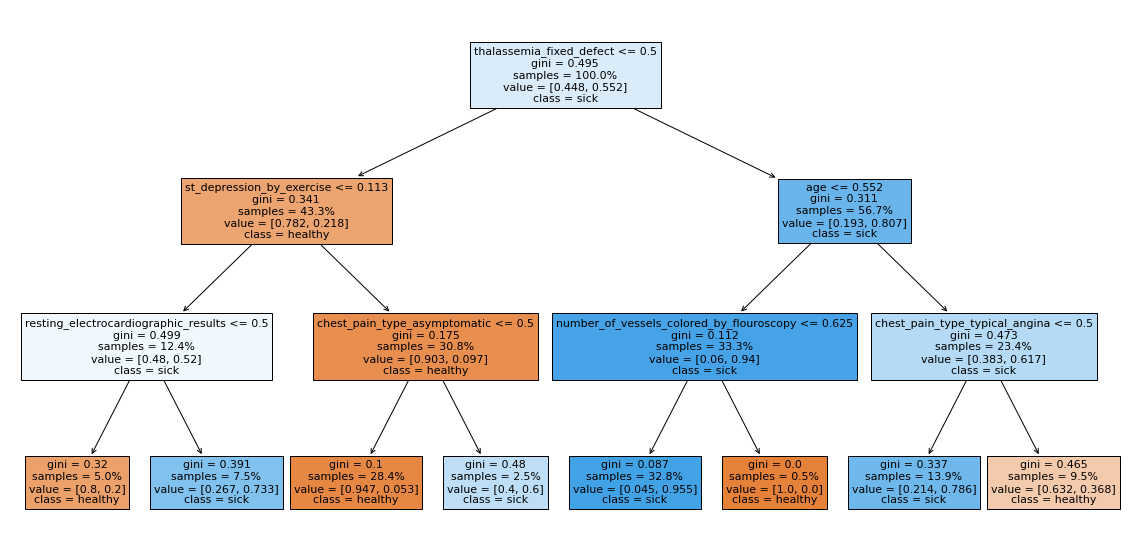

In [24]:
plt.figure(figsize = (20,10))
sklearn.tree.plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    tree, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = cardiovascular_diseases_features.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["healthy","sick"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

Para evaluar el nivel de importancia que tienen las caracterñisticas, los algoritmos basados en árboles nos ofrecen la importancia de cada variable al calcular normalmente el Mean Decrease Gini, pueden encontrar más información acá https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

In [25]:
tree_vil = pd.DataFrame(list(zip(feature_names,tree.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
tree_vil.sort_values("importance",ascending=False)

,importance
feature,
thalassemia_fixed_defect,0.586963
st_depression_by_exercise,0.109562
age,0.099111
chest_pain_type_typical_angina,0.067671
resting_electrocardiographic_results,0.058594
chest_pain_type_asymptomatic,0.047284
number_of_vessels_colored_by_flouroscopy,0.030815
thalassemia_normal,0.000000
chest_pain_type_non_anginal_pain,0.000000


Uno de los hiperparámetros de los árboles de decisión es la profundidad del mismo. Evaluemos cómo se comporta su rendimiento al cambiar la profundidad del árbol.

In [26]:
depths = range(1,10)
performances = []
for depth in depths:
    current_tree = sklearn.tree.DecisionTreeClassifier( # Instanciamos nuestro árbol de decisión.
    max_depth=depth, # Forzamos que nuestro árbol sólo tenga 3 niveles de profundidad.
    random_state = 11
    )
    roc_auc = sklearn.model_selection.cross_val_score(
      current_tree,
      cardiovascular_diseases_features, 
      cardiovascular_diseases_label,
      scoring="roc_auc"
    ).mean()
    performances.append(roc_auc)

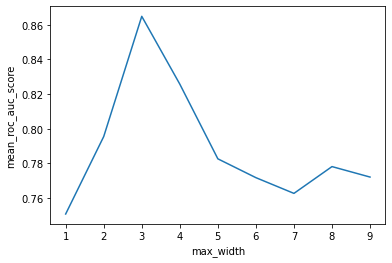

In [27]:
plt.plot(
    depths,
    performances
)
plt.xlabel("max_width")
plt.ylabel("mean_roc_auc_score")
plt.show()

## Random forests

En Random Forest, cada árbol en el conjunto está construido desde una muestra del conjunto de entrenamiento.

In [28]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(cardiovascular_diseases_features_train, cardiovascular_diseases_label_train)

RandomForestClassifier()

In [29]:
rf_predictions = rf.predict(cardiovascular_diseases_features_test)

Evaluamos el rendimiento de nuestro modelo y evidenciamos que es significativamente mayor que un árbol de decisión único.

In [30]:
print(sklearn.metrics.classification_report(cardiovascular_diseases_label_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        47
           1       0.81      0.83      0.82        53

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



Una de la información de inferencia que podemos extraer desde nuesto modelo entrenado es la lista de importancia de características, con la cual podemos conocer qué características son más importantes para el modelo.

In [31]:
rf_vil = pd.DataFrame(list(zip(feature_names,rf.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
rf_vil.sort_values("importance",ascending=False)

,importance
feature,
thalassemia_fixed_defect,0.131417
maximum_heart_rate_achieved,0.122858
st_depression_by_exercise,0.103163
thalassemia_reversable_defect,0.092048
age,0.082439
number_of_vessels_colored_by_flouroscopy,0.072882
resting_blood_pressure,0.072560
cholesterol,0.069000
chest_pain_type_typical_angina,0.065660


Random Forest es un conjunto de árboles de decisión independientes, por lo podemos extraer uno de ellos y explorarlo directamente.

In [32]:
random_tree = rf.estimators_[-1]

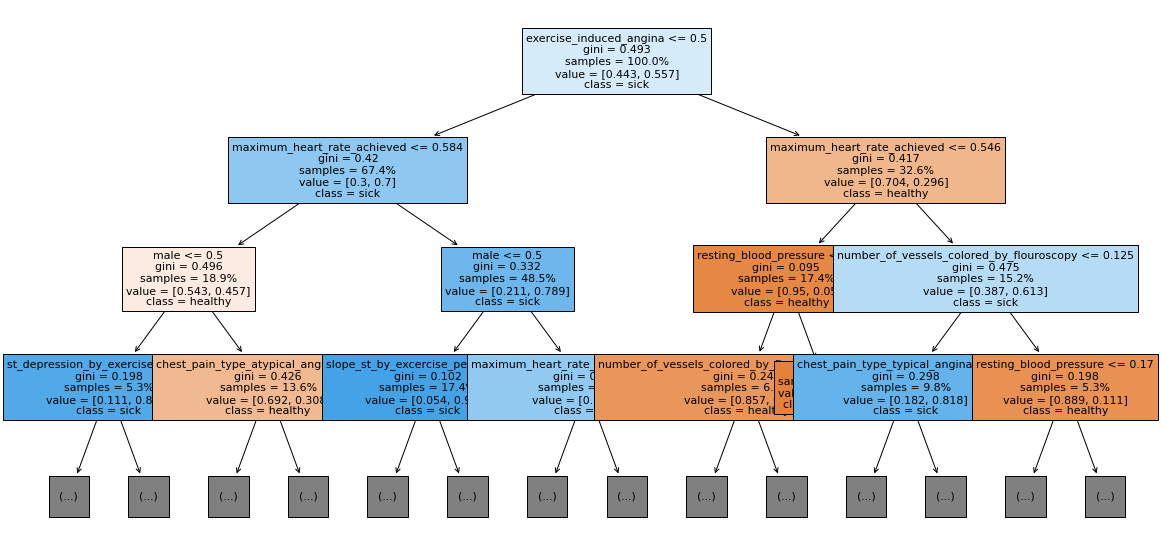

In [33]:
plt.figure(figsize = (20,10))
sklearn.tree.plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    random_tree, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = cardiovascular_diseases_features.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["healthy","sick"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.,
    max_depth=3 # Profundidad máxima del árbol
)
plt.show()

## Clasificador tonto

Para colocar los resultados obtenidos en contexto, podemos entenar un clasificador que sólo se base en la probabilidad de las clases y que retorne una clase al azar basado en la distribución de probabilidad de las clases. Este tipo de clasificación sería la más ingenua.

In [34]:
dummy = sklearn.dummy.DummyClassifier(strategy="stratified", random_state=11)
dummy.fit(cardiovascular_diseases_features_train, cardiovascular_diseases_label_train)

DummyClassifier(random_state=11, strategy='stratified')

In [35]:
dummy_predictions = dummy.predict(cardiovascular_diseases_features_test)

In [36]:
print(sklearn.metrics.classification_report(cardiovascular_diseases_label_test, dummy_predictions))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47        47
           1       0.52      0.49      0.50        53

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100

